# 1. Merge data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau
import seaborn as sns
shanghai_ranking = pd.read_csv('data/Shanghai_ranking_data_2023.csv')
shanghai_ranking.Name = shanghai_ranking.Name.astype(str).str.strip()
THE_ranking = pd.read_csv('data/THE_ranking_data_2023.csv')
THE_ranking.Name = THE_ranking.Name.astype(str).str.strip()
qs_ranking = pd.read_csv('data/QS_ranking_data_2023.csv')
qs_ranking.Name = qs_ranking.Name.astype(str).str.strip()

In [2]:
# THE_ranking = pd.read_csv('data/THE_ranking_data.csv')
# for index, item in enumerate(THE_ranking.RankTHE):
#     item = item.replace('–','-')
#     THE_ranking.at[index,'RankTHE'] = item
# THE_ranking.to_csv('output.csv')

In [3]:
THE_ranking=THE_ranking.drop(np.where(THE_ranking.RankTHE=='Reporter')[0])
THE_ranking

,Unnamed: 0,RankTHE,Name,No. of FTE students,No. of students per staff,International Students,Female:Male Ratio,Overall,Teaching,Research Environment,Research Quality,Industry,International Outlook
0,0,1,University of Oxford,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,1,2,Harvard University,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,2,=3,University of Cambridge,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,=3,Stanford University,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,4,5,Massachusetts Institute of Technology,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,1653,1501+,West University of Timişoara,"14,527",24.6,6%,66 : 34,10.4–18.3,18.7,13.4,16.8,37.7,28.7
1654,1654,1501+,Wrocław University of Science and Technology,"23,657",20.3,6%,35 : 65,10.4–18.3,17.9,16.0,14.9,45.5,27.3
1655,1655,1501+,Yamaguchi University,"10,724",11.1,7%,38 : 62,10.4–18.3,21.3,12.3,13.9,43.8,30.4
1656,1656,1501+,Yanshan University,"38,649",13.2,1%,39 : 61,10.4–18.3,17.2,10.9,18.3,46.9,17.0


In [4]:
def merge(Rank1:pd.DataFrame, Rank2:pd.DataFrame, bias) -> pd.DataFrame:
    import Levenshtein
    distance = np.empty((len(Rank1.Name),len(Rank2.Name)))
    Rank1 = Rank1.rename(columns={'Name':'Name1'})
    Rank2 = Rank2.rename(columns={'Name':'Name2'})
    for index1, rank1 in enumerate(Rank1.Name1):
        for index2, rank2 in enumerate(Rank2.Name2):
            distance[index1, index2] = Levenshtein.distance(rank1, rank2)
    merged_rank = pd.DataFrame({})
    for i in range(distance.shape[0]):
        j = np.argmin(distance[i, :])
        if distance[i, j] == bias:
            # print('i:',repr(Rank1.Name1[i]),'j:',repr(Rank2.Name2[j]),'distance:',distance[i, j])
            merged_row = pd.concat([Rank1.iloc[i], Rank2.iloc[j]], axis=0)
            merged_row = merged_row.to_frame().T
            merged_rank = pd.concat([merged_rank, merged_row])
    merged_rank = merged_rank.reset_index(drop=True)
    return merged_rank

def clean(merged_rank:pd.DataFrame, row=[]) -> pd.DataFrame:
    for i in row:
        merged_rank = merged_rank.drop(i)
    merged_rank = merged_rank.drop('Name2',axis=1)
    merged_rank = merged_rank.rename(columns={'Name1':'Name'}).reset_index(drop=True)
    return merged_rank

In [5]:
merged_rank1 = merge(shanghai_ranking,qs_ranking,0)
merged_rank1 = clean(merged_rank1)
merged_rank2 = merge(shanghai_ranking,qs_ranking,1)
merged_rank2 = clean(merged_rank2)
merged_rank = pd.concat([merged_rank1,merged_rank2])
merged_rank = merged_rank.reset_index(drop=True)

In [6]:
merged_rank1 = merge(merged_rank,THE_ranking,0)
merged_rank1 = clean(merged_rank1)
merged_rank2 = merge(merged_rank,THE_ranking,1)
merged_rank2 = clean(merged_rank2)
merged_rank = pd.concat([merged_rank1,merged_rank2])
merged_rank = merged_rank.reset_index(drop=True)
merged_rank

,RankShangHai,Name,Region,Regional rank,Total score,Alumni,Award,Hici,N&S,PUB,...,No. of FTE students,No. of students per staff,International Students,Female:Male Ratio,Overall,Teaching,Research Environment,Research Quality,Industry,International Outlook
0,1,Harvard University,us,1,100.0,100.0,92.6,100.0,100.0,100.0,...,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
1,2,Stanford University,us,2,74.8,45.6,88.1,73.6,82.8,67.5,...,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
2,4,University of Cambridge,gb,1,67.9,78.9,90.8,45.1,61.0,63.6,...,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,6,Princeton University,us,5,60.1,61.7,100.0,32.9,50.4,39.4,...,"8,279",8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
4,7,University of Oxford,gb,2,59.5,49.9,59.7,51.4,57.6,71.4,...,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,301-400,University of Milano-Bicocca,it,9-10,NaN,23.1,0.0,11.4,7.2,34.2,...,"29,057",29.2,5%,62 : 38,47.0–48.7,24.9,25.9,93.6,40.8,43.0
331,601-700,Umea University,se,11,NaN,15.5,0.0,0.0,9.7,29.1,...,"18,218",12.6,11%,61 : 39,42.1–44.9,21.9,29.6,78.4,38.5,64.5
332,101-150,Xi'an Jiaotong University,cn,11-23,NaN,20.3,0.0,18.6,16.4,70.6,...,"44,942",14.1,6%,35 : 65,39.3–42.0,36.4,42.7,47.1,75.0,29.4
333,151-200,Aix Marseille University,fr,6-8,NaN,19.0,0.0,18.6,21.5,48.1,...,"70,054",17.4,13%,60 : 40,47.0–48.7,40.5,24.9,72.3,41.5,63.2


In [7]:
sample_rank = merged_rank.loc[:,['Name','RankShangHai','RankQS','RankTHE']]
sample_rank

,Name,RankShangHai,RankQS,RankTHE
0,Harvard University,1,5,2
1,Stanford University,2,3,=3
2,University of Cambridge,4,2,=3
3,Princeton University,6,16=,7
4,University of Oxford,7,4,1
...,...,...,...,...
330,University of Milano-Bicocca,301-400,601-650,301-350
331,Umea University,601-700,369=,401-500
332,Xi'an Jiaotong University,101-150,302,501-600
333,Aix Marseille University,151-200,490=,301-350


In [8]:
sample_rank = merged_rank.loc[:,['Name','RankShangHai','RankQS','RankTHE']]

def level(rank,rankname):
    for index, item in enumerate(rank[rankname]):
        item=str(item)
        if '=' in item:
            rank.at[index, rankname] = item.replace('=','')
        if '+' in item:
            rank.at[index, rankname] = item.replace('+','')
        if '-' in item:
            numbers = item.split('-')
            num1, num2 = map(int, numbers)
            # print(numbers)
            avg = str(int((num1+num2)/2))
            rank.at[index, rankname] = avg
    rank = rank.reset_index(drop=True)
    return rank
sample_rank = level(sample_rank,'RankQS')
sample_rank = level(sample_rank,'RankTHE')
sample_rank = level(sample_rank,'RankShangHai')
sample_rank.RankQS = sample_rank.RankQS.astype(int)
sample_rank.RankTHE = sample_rank.RankTHE.astype(int)
sample_rank.RankShangHai = sample_rank.RankShangHai.astype(int)
sample_rank

,Name,RankShangHai,RankQS,RankTHE
0,Harvard University,1,5,2
1,Stanford University,2,3,3
2,University of Cambridge,4,2,3
3,Princeton University,6,16,7
4,University of Oxford,7,4,1
...,...,...,...,...
330,University of Milano-Bicocca,350,625,325
331,Umea University,650,369,450
332,Xi'an Jiaotong University,125,302,550
333,Aix Marseille University,175,490,325


In [9]:
def MJ(rank):
    rank_number = rank.shape[1] - 1
    rank = rank.set_index('Name')
    rank['MedianRank'] = rank.median(axis=1)
    rank['RankMJ'] = 0
    rank['Temp'] = 0.0
    unique_medians = rank['MedianRank'].unique()
    sorted_medians = sorted(unique_medians)
    
    rankMJ = 1  # 初始化排名
    # 对每个中位数分组内的学校进行排序
    for median in sorted_medians:
        # 找出所有中位数排名相同的学校
        tied_df = rank[rank['MedianRank'] == median]
        
        # 如果只有一个学校，则直接分配当前排名
        if len(tied_df) == 1:
            rank.loc[tied_df.index, 'RankMJ'] = rankMJ
            rankMJ += 1
        else:
            # 如果有多个学校并列，根据其他排名的中位数来分配先后顺序
            for i in range(len(tied_df)):
                t = []
                label = False
                for j in range(rank_number):
                    if tied_df.iloc[[i],[j]].values == tied_df.iloc[[i],[rank_number]].values and label == False:
                        label = True
                    else:
                        t.append(tied_df.iloc[[i],[j]].values)
                tied_df.iloc[[i],[rank_number+2]] = np.median(t)
            # 根据平均排名对并列的学校进行排序
            tied_df = tied_df.sort_values(by='Temp')
            aaa = tied_df['Temp'].value_counts()
            # 分配排名
            cal=0
            for idx in tied_df.index:
                rank.loc[idx, 'NewMedianRank'] = tied_df.loc[idx,'Temp']
                rank.loc[idx, 'RankMJ'] = rankMJ
                cal += 1
                if tied_df.loc[idx,'Temp'] in aaa.index:
                    if cal == aaa[tied_df.loc[idx,'Temp']]:
                        rankMJ += aaa[tied_df.loc[idx,'Temp']]
                        cal=0
    rank = rank.drop('NewMedianRank', axis=1)
    rank = rank.drop('MedianRank', axis=1)
    return rank.drop('Temp', axis=1)

RankMJ1 = MJ(sample_rank)
RankMJ1

,RankShangHai,RankQS,RankTHE,RankMJ
Name,,,,
Harvard University,1,5,2,1
Stanford University,2,3,3,2
University of Cambridge,4,2,3,3
Princeton University,6,16,7,5
University of Oxford,7,4,1,4
...,...,...,...,...
University of Milano-Bicocca,350,625,325,185
Umea University,650,369,450,226
Xi'an Jiaotong University,125,302,550,154


Text(0.5, 1.0, 'Tau between different ranking')

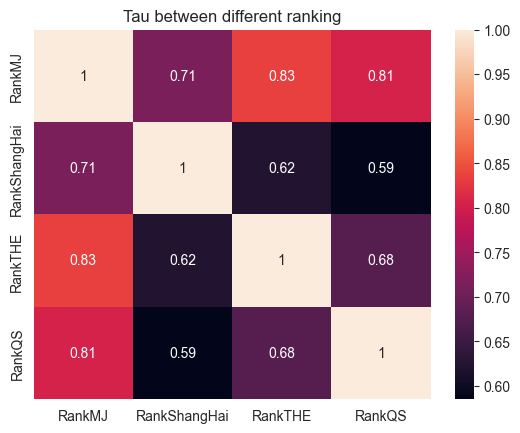

In [10]:
rank_name_list = ['RankMJ','RankShangHai','RankTHE','RankQS']
sub_rank = RankMJ1.loc[:,rank_name_list]
tau = np.zeros([sub_rank.shape[1],sub_rank.shape[1]])
for i in range(sub_rank.shape[1]):
    for j in range(sub_rank.shape[1]):
        tau[i,j],_ = kendalltau(sub_rank.iloc[:,i],sub_rank.iloc[:,j])

ax = sns.heatmap(tau,annot=True,xticklabels=rank_name_list,yticklabels=rank_name_list)
ax.set_title('Tau between different ranking')

In [11]:
sample_rank2 = merged_rank.loc[:, ['Name','Alumni','Hici','PUB','PCP']]
sample_rank2

,Name,Alumni,Hici,PUB,PCP
0,Harvard University,100.0,100.0,100.0,86.7
1,Stanford University,45.6,73.6,67.5,58.0
2,University of Cambridge,78.9,45.1,63.6,60.4
3,Princeton University,61.7,32.9,39.4,76.7
4,University of Oxford,49.9,51.4,71.4,48.5
...,...,...,...,...,...
330,University of Milano-Bicocca,23.1,11.4,34.2,23.1
331,Umea University,15.5,0.0,29.1,15.5
332,Xi'an Jiaotong University,20.3,18.6,70.6,20.3
333,Aix Marseille University,19.0,18.6,48.1,19.0


In [12]:
sample_rank2 = merged_rank.loc[:, ['Name','Alumni','Hici','PUB','PCP']]
sample_rank2['RankAlumni'] = sample_rank2.Alumni.rank(method='average',ascending=False).astype(int)
sample_rank2 = sample_rank2.drop('Alumni',axis=1) 
sample_rank2['RankHici'] = sample_rank2.Hici.rank(method='average',ascending=False).astype(int)
sample_rank2 = sample_rank2.drop('Hici',axis=1) 
sample_rank2['RankPUB'] = sample_rank2.PUB.rank(method='average',ascending=False).astype(int)
sample_rank2 = sample_rank2.drop('PUB',axis=1) 
sample_rank2['RankPCP'] = sample_rank2.PCP.rank(method='average',ascending=False).astype(int)
sample_rank2 = sample_rank2.drop('PCP',axis=1) 
sample_rank2

,Name,RankAlumni,RankHici,RankPUB,RankPCP
0,Harvard University,1,1,1,1
1,Stanford University,7,2,16,4
2,University of Cambridge,2,10,23,3
3,Princeton University,3,30,128,2
4,University of Oxford,6,5,12,5
...,...,...,...,...,...
330,University of Milano-Bicocca,96,186,177,103
331,Umea University,261,317,245,265
332,Xi'an Jiaotong University,153,98,13,158
333,Aix Marseille University,178,98,72,183


In [13]:
RankMJ2 = MJ(sample_rank2)
RankMJ2

,RankAlumni,RankHici,RankPUB,RankPCP,RankMJ
Name,,,,,
Harvard University,1,1,1,1,1
Stanford University,7,2,16,4,2
University of Cambridge,2,10,23,3,4
Princeton University,3,30,128,2,11
University of Oxford,6,5,12,5,2
...,...,...,...,...,...
University of Milano-Bicocca,96,186,177,103,138
Umea University,261,317,245,265,277
Xi'an Jiaotong University,153,98,13,158,124


KJ

In [37]:
from itertools import combinations, permutations, combinations_with_replacement
# def build_graph(ranks):
#     n_candidates, n_voters = ranks.shape
#     edge_weights = np.full((n_candidates, n_candidates),0)
#     for i, j in combinations(range(n_candidates), 2):
#         preference = ranks.iloc[i,1:] - ranks.iloc[j,1:]
#         # print(preference)
#         h_ij = np.sum(preference[preference<0])
#         h_ji = np.sum(preference[preference>0])
#         edge_weights[i, j] = h_ij
#         edge_weights[j, i] = -h_ji
#     return edge_weights
def build_graph(ranks):
    n_candidates, n_voters = ranks.shape
    edge_weights = np.full((n_candidates, n_candidates),3)
    for i, j in combinations(range(n_candidates), 2):
        preference = ranks.iloc[i,1:] - ranks.iloc[j,1:]
        # print(preference)
        h_ij = np.sum(preference<0)
        h_ji = np.sum(preference>0)
        edge_weights[i, j] -= h_ij
        edge_weights[j, i] -= h_ji
    return -np.min(edge_weights)+edge_weights
distance = build_graph(sample_rank)
distance

array([[3, 1, 1, ..., 0, 0, 0],
       [2, 3, 2, ..., 0, 0, 0],
       [2, 2, 3, ..., 0, 0, 0],
       ...,
       [3, 3, 3, ..., 3, 1, 1],
       [3, 3, 3, ..., 2, 3, 2],
       [3, 3, 3, ..., 2, 1, 3]])

In [38]:
sum = 0
for i in range(334):
    sum += distance[i,i+1]
sum

623

In [39]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model(distance_matrix):
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('总行程长度: {} 公里'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = '路径:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)

def main(distance_matrix):
    # 初始化数据
    data = create_data_model(distance_matrix)

    # 创建路由索引管理器
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']), 
                                           data['num_vehicles'], data['depot'])

    # 创建 Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # 计算两点之间的距离
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # 定义成本的每一对点
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 设置启发式搜索方法
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # 求解问题
    solution = routing.SolveWithParameters(search_parameters)

    # 输出结果
    if solution:
        print_solution(manager, routing, solution)


# 运行主函数
main(distance)


总行程长度: 207 公里
路径:
 0 -> 12 -> 16 -> 38 -> 55 -> 77 -> 94 -> 148 -> 334 -> 277 -> 331 -> 223 -> 291 -> 243 -> 283 -> 14 -> 18 -> 86 -> 145 -> 181 -> 236 -> 280 -> 287 -> 32 -> 84 -> 110 -> 180 -> 213 -> 292 -> 257 -> 285 -> 295 -> 288 -> 333 -> 311 -> 276 -> 261 -> 300 -> 332 -> 284 -> 228 -> 263 -> 289 -> 113 -> 185 -> 211 -> 268 -> 238 -> 247 -> 177 -> 232 -> 273 -> 237 -> 260 -> 298 -> 156 -> 158 -> 88 -> 200 -> 240 -> 254 -> 290 -> 144 -> 179 -> 227 -> 252 -> 329 -> 206 -> 192 -> 242 -> 104 -> 132 -> 183 -> 218 -> 314 -> 190 -> 217 -> 316 -> 187 -> 215 -> 307 -> 197 -> 241 -> 296 -> 53 -> 160 -> 222 -> 255 -> 305 -> 120 -> 161 -> 204 -> 293 -> 172 -> 265 -> 297 -> 209 -> 85 -> 142 -> 196 -> 212 -> 134 -> 189 -> 221 -> 178 -> 226 -> 140 -> 182 -> 219 -> 249 -> 294 -> 176 -> 267 -> 92 -> 128 -> 169 -> 235 -> 112 -> 141 -> 202 -> 214 -> 149 -> 171 -> 152 -> 173 -> 208 -> 199 -> 205 -> 63 -> 151 -> 166 -> 210 -> 324 -> 282 -> 321 -> 4 -> 21 -> 24 -> 79 -> 244 -> 279 -> 165 -> 231 -> 275